<h1><center>EDA on heart failure clinical recorde
</center></h1>

In [132]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

<h1>About - Dataset:
</h1>
<p>The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.</p>

In [133]:
## Reading dataset from CSV file using pandas dataframe

df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [134]:
## More information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [135]:
## shape of data set
df.shape

(299, 13)

In [136]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<h3>Q1. What is the distribution of age among heart failure patients in the dataset? </h3>
<p>Answer</p>

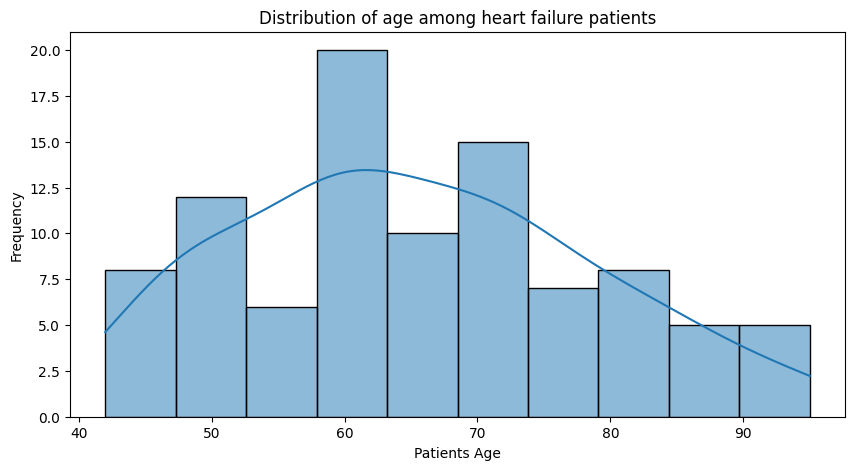

In [138]:
heart_failure_patients=df[df['DEATH_EVENT']==1]

plt.figure(figsize=(10,5))
sns.histplot(heart_failure_patients['age'], kde=True, bins=10 )
plt.title('Distribution of age among heart failure patients')
plt.xlabel('Patients Age')
plt.ylabel('Frequency')
plt.show()

<p><b>Answer</b></p>
<p>From the above distribution of age, it seem that most of heart failure patient are belong age group of 60's.</p>

<h3>Q2. How does the death rate vary with age?
</h3>
<p>Answer</p>

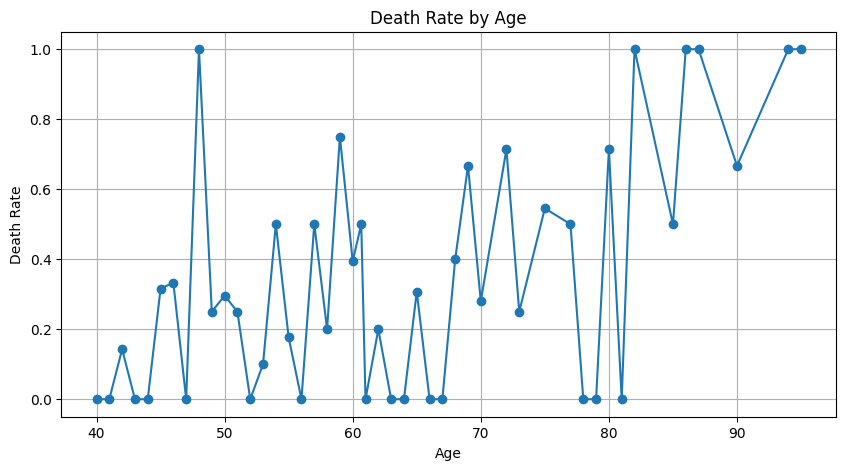

In [139]:
death_rate=df.groupby('age')['DEATH_EVENT'].mean()

plt.figure(figsize=(10,5))
plt.plot(death_rate.index, death_rate.values,  marker='o', linestyle='-')
plt.title('Death Rate by Age')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()

<h3>Q3. What is the percentage of male and female patients in the dataset?</h3>
<p>Answer</p>

In [140]:
# Sex: Gender of the patient (binary: 0 for female, 1 for male).

Total_patients=df['sex'].value_counts().sum()
Male_patients=sum([i for i in df['sex'] if i==1])
Female_patients=Total_patients-Male_patients

Male_percentage = (Male_patients /(Total_patients)) * 100
Female_percentage = (Female_patients /(Total_patients)) * 100

print(f'Percentage of male patients in dataset: {Male_percentage:.3f}')
print(f'Percentage of female patients in dataset: {Female_percentage:.3f}')

Percentage of male patients in dataset: 64.883
Percentage of female patients in dataset: 35.117


<h3>Q4. How does the platelet count vary among different age groups?</h3>
<p><b>Answer</b></p>

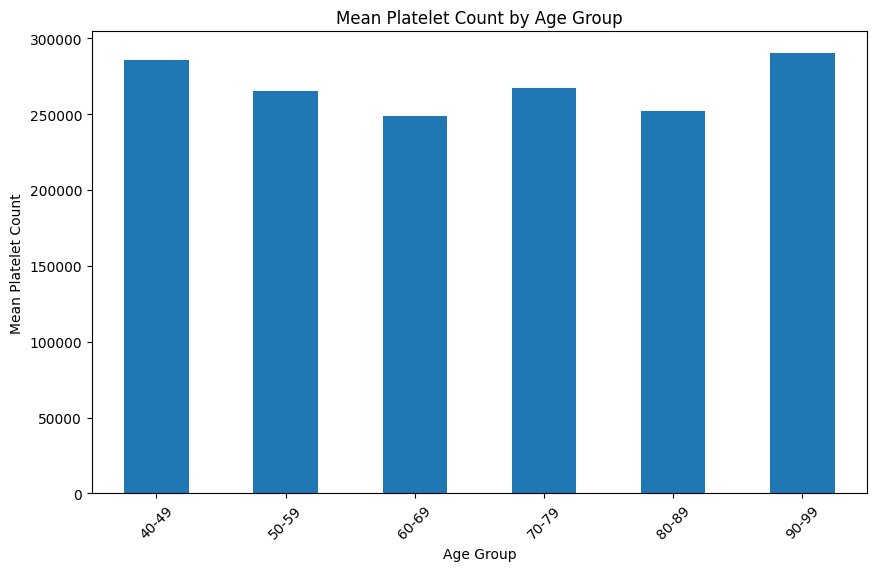

In [141]:
bins = [ 40, 50, 60, 70, 80, 90, 100]
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

Mean_platelet_counts=df.groupby('age_group')['platelets'].mean()

plt.figure(figsize=(10, 6))
Mean_platelet_counts.plot(kind='bar')
plt.title('Mean Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Platelet Count')
plt.xticks(rotation=45)
plt.show()

<h3>Q5. Is there a correlation between creatinine and sodium level in the blood?</h3>

<Axes: xlabel='creatinine_phosphokinase', ylabel='serum_sodium'>

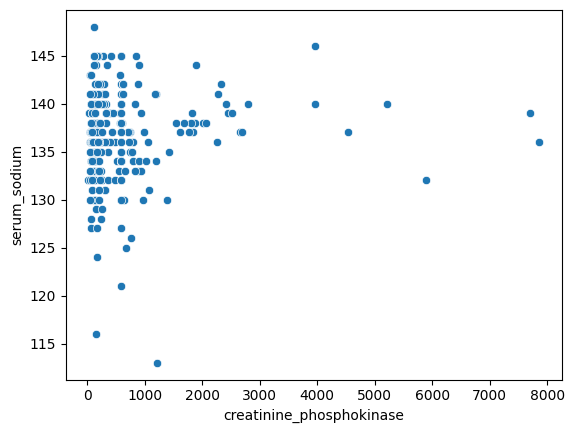

In [142]:
## Creating a graph between creatinie and sodium level in the blood

sns.scatterplot(x=df['creatinine_phosphokinase'], y=df['serum_sodium'])

In [143]:
## checking the correlation 
relation=df['creatinine_phosphokinase'].corr(df['serum_sodium'])
print(f"Correlation coefficient:  {relation} ")

Correlation coefficient:  0.059550155833725714 


<p><b>Answer.</b>
</p>
<p>From the above observation, we can say that the correlation coefficient is near to zero that is the indication that there was a <strong>very week</strong> correlation between creatinine and sodium level in blod.</p>

<h3>Q6. How does the prevalence of high blood pressure differ male and female patients?</h3>
<p><b>Answer</b></p>

In [144]:
# High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).
df['high_blood_pressure'] = pd.to_numeric(df['high_blood_pressure'], errors='coerce')

# Separate data into male and female groups
male_data = df[df['sex'] == 1]
female_data = df[df['sex'] == 0]

# Calculate prevalence of high blood pressure for each group
male_prevalence = male_data['high_blood_pressure'].mean()
female_prevalence = female_data['high_blood_pressure'].mean()

print(f"Prevalence of high blood pressure among males: {male_prevalence}")
print(f"Prevalence of high blood pressure among females: {female_prevalence}")

Prevalence of high blood pressure among males: 0.31443298969072164
Prevalence of high blood pressure among females: 0.41904761904761906


<h3>Q7. What is the relationship between smoking habits and the occurrence of heart failure?</h3>
<p><b>Answer</b></p>

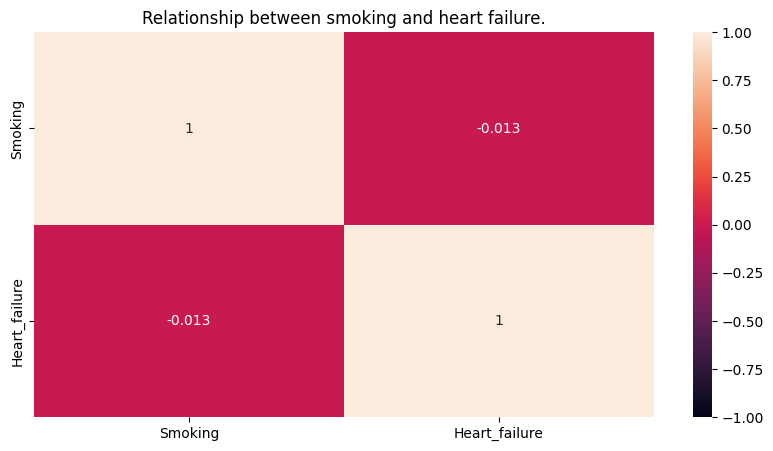

In [145]:
smoking_and_heart_failure=pd.DataFrame({'Smoking':df['smoking'], 'Heart_failure':df['DEATH_EVENT']})

plt.figure(figsize=(10,5))
sns.heatmap(data=smoking_and_heart_failure.corr(), annot=True, vmax=1, vmin=-1)
plt.title('Relationship between smoking and heart failure.')
plt.show()

A value close to 0 (whether positive or negative) indicates a weak correlation. In this case, -0.13 suggests that the two variables do not have a strong linear relationship.

<h3>Q8. Are there any noticable patterns in the distribution of death events across different age groups?</h3>
<p><b>Answer</b></p>

Yes, there is noticable patterns in the distribution of death events across differents age groups.
- The people of age group 60-70 have more heart failure and death events as compares to other age groups.
- And the cases of death event or heart failure are low at age group above 90's as compares to other age groups. 

<h3>Q9. Is there any significant difference in ejection fraction between patients with and without diabetes?</h3>
<p><b>Answer</b></p>

In [146]:
from scipy.stats import ttest_ind 

ejection_fraction_with_diabetes=df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_without_diabetes=df[df['diabetes'] == 0]['ejection_fraction']

t_stat, p_value = ttest_ind(ejection_fraction_with_diabetes, ejection_fraction_without_diabetes)

print('T-statistic:', t_stat)
print('P-value:', p_value)

# Determine if the difference is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")

T-statistic: -0.08358970647234736
P-value: 0.9334389630426103
There is no significant difference in ejection fraction between patients with and without diabetes.


<h3>Q10. How does the serum creatine level vary between patients who survived and those who did not?</h3>
<p><b>Answer</b></p>

T-statistic: -5.306457599754319
P-value: 2.1901978548979685e-07
There is a significant difference in serum creatinine levels between patients who survived and those who did not.


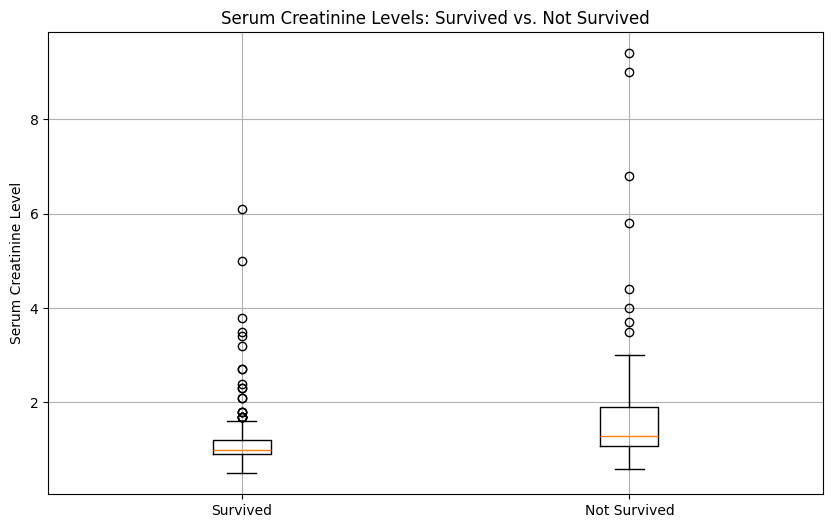

In [147]:
serum_creatine_level_with_survived=df[df['DEATH_EVENT']==0]['serum_creatinine']
serum_creatine_level_with_not_survived=df[df['DEATH_EVENT']==1]['serum_creatinine']

t_stat, p_value = ttest_ind(serum_creatine_level_with_survived, serum_creatine_level_with_not_survived)

print('T-statistic:', t_stat)
print('P-value:', p_value)

# Determine if the difference is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in serum creatinine levels between patients who survived and those who did not.")
else:
    print("There is no significant difference in serum creatinine levels between patients who survived and those who did not.")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.boxplot([serum_creatine_level_with_survived, serum_creatine_level_with_not_survived], labels=['Survived', 'Not Survived'])
plt.title('Serum Creatinine Levels: Survived vs. Not Survived')
plt.ylabel('Serum Creatinine Level')
plt.grid(True)
plt.show()